## Homework 3, Solution

Bootstrap and Testing

1. Test the hypothesis that the survival rates for female passengers in Pclass 1 was no larger than in Pclass 2.
2. Create a boxplot `mpg ~ cylinders`. It does seem that the mpg for cars with 4 cylinders is quite different from those with 3 cylinders. What does a bootstrap test tell you about this hypothesis?
3. Can you think of more interesting hypotheses to test regarding the pregnancy data ?

In [1]:
%run ../Lessons/ourFunctions.py

In [16]:
#Titanic data:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
#Test the hypothesis that the survival rates for female passengers
#in Pclass 1 was no larger than in Pclass 2.
#toss away first class and men for this exercise
FemPass12 = titanic[(titanic.pclass !=3) & (titanic.sex =="female")]

print(np.mean(FemPass12[FemPass12.pclass ==1].survived))
print(np.mean(FemPass12[FemPass12.pclass ==2].survived))

0.9680851063829787
0.9210526315789473


The one sided p value of 0.897 is  greater or equal  than alpha= 0.05 , so we fail to  reject the Null
-> The observed difference of  -0.047 could  have occurred by chance alone


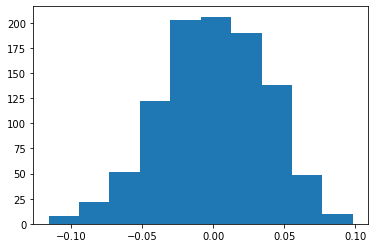

In [43]:
def print_pVal(pVal,a,empirical_diff_means):
    s = "smaller";s2 = "";s3="is extremely unlikely to"
    if (pVal >= a):
        s = "greater or equal"
        s2 = "fail to"
        s3 ="could"
        
    print("The one sided p value of", np.round(pVal,3), "is ",s," than alpha=",a,", so we",s2," reject the Null" ) 

    print("-> The observed difference of ", np.round(empirical_diff_means,3), s3," have occurred by chance alone")


def bs_2sampletest(titanic, M=1000, func = np.mean, a = 0.05):
    meanNull = np.mean(titanic.survived)# pooled mean
    p2 = titanic[titanic.pclass ==2].survived
    p1 = titanic[titanic.pclass ==1].survived

    empirical_diff_means = np.mean(p2)-np.mean(p1) 
    #shift:

    p2_shifted = p2 - np.mean(p2) + meanNull
    p1_shifted = p1 - np.mean(p1) + meanNull

    # Compute 10,000 bootstrap replicates from shifted arrays
    bs_replicates_m = draw_bs_reps(p2_shifted, func, M)
    bs_replicates_f = draw_bs_reps(p1_shifted, func, M)

    # Get replicates of difference of means: bs_replicates
    bs_replicates = bs_replicates_m - bs_replicates_f
    
    # Compute and print p-value: p
    pVal = np.mean(bs_replicates > empirical_diff_means)
    print_pVal(pVal,a,empirical_diff_means)
    return bs_replicates

bs_replicates=bs_2sampletest(FemPass12)
tmp=plt.hist(bs_replicates)


-------------------------------------------
Create a boxplot mpg ~ cylinders. It does seem that the mpg for cars with 4 cylinders is quite different from those with 3 cylinders. What does a bootstrap test tell you about this hypothesis?


In [20]:
#Auto data:
cars = pd.read_csv('../data/Auto.csv')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


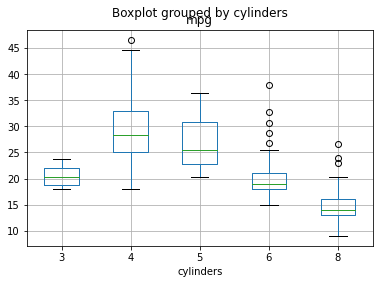

In [22]:
tmp=cars.boxplot( "mpg","cylinders")

The one sided p value of 1.0 is  greater or equal  than alpha= 0.05 , so we fail to  reject the Null
-> The observed difference of  -8.734 could  have occurred by chance alone


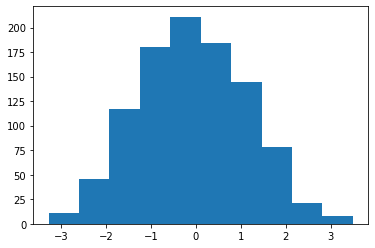

In [27]:
cars34 = cars[ (cars.cylinders ==3) | (cars.cylinders ==4)]

def bs_2sampletest(df, M=1000, func = np.mean, a = 0.05):
    meanNull = np.mean(df.mpg)# pooled mean
    p2 = df[df.cylinders ==3].mpg
    p1 = df[df.cylinders ==4].mpg

    empirical_diff_means = np.mean(p2)-np.mean(p1) 
    #shift:

    p2_shifted = p2 - np.mean(p2) + meanNull
    p1_shifted = p1 - np.mean(p1) + meanNull

    # Compute 10,000 bootstrap replicates from shifted arrays
    bs_replicates_m = draw_bs_reps(p2_shifted, func, M)
    bs_replicates_f = draw_bs_reps(p1_shifted, func, M)

    # Get replicates of difference of means: bs_replicates
    bs_replicates = bs_replicates_m - bs_replicates_f
    
    # Compute and print p-value: p
    pVal = np.mean(bs_replicates > empirical_diff_means)
    #cutoff right tail
    #np.percentile(bs_replicates, 95)
    s = "smaller";s2 = "";s3="is extremely unlikely to"
    if (pVal >= a):
        s = "greater or equal"
        s2 = "fail to"
        s3 ="could"
        
    print("The one sided p value of", np.round(pVal,3), "is ",s," than alpha=",a,", so we",s2," reject the Null" ) 

    print("-> The observed difference of ", np.round(empirical_diff_means,3), s3," have occurred by chance alone")

    return bs_replicates

bs_replicates=bs_2sampletest(cars34)
tmp=plt.hist(bs_replicates)

-------------------------------------------
Can you think of more interesting hypotheses to test regarding the pregnancy data ?

In [4]:
#pregnancy data:
preg=pd.read_hdf('../data/pregNSFG.h5', 'df')
#only look at live births
live = preg[preg.outcome == 1]
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


We saw a significant difference between male and female babies weights. Could it be that the lion share of the weight gain is "achieved" in the last weeks of the pregnancy ?
So let us test the weight difference for premature babies only:

In [34]:
#we reduce the sample size further by conditioning on 
#the mother's age at the end of pregnancy
#firsts = preg[(preg.outcome == 1) & (preg.birthord == 1)]
bwt = live[(live.agepreg < 40) & (live.prglngth < 30)][["babysex","totalwgt_lb"]] 

bwt.babysex.replace([1.0],"male",inplace=True)
bwt.babysex.replace([2.0],"female",inplace=True)
bwt = bwt.dropna()
print(bwt.shape)
bwt.head()

(121, 2)


,babysex,totalwgt_lb
138,female,6.500
157,male,1.375
237,male,6.375
541,male,1.375
628,female,1.625


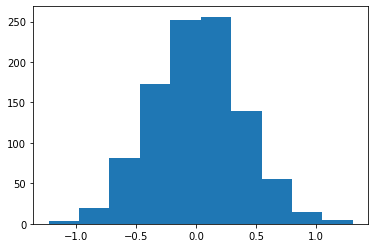

In [44]:
meanNull = np.mean(bwt.totalwgt_lb)# pooled mean
w_m = bwt[bwt["babysex"]=="male"].totalwgt_lb
w_f = bwt[bwt["babysex"]=="female"].totalwgt_lb
empirical_diff_means = np.mean(w_m)-np.mean(w_f) 
#shift:

w_m_shifted = w_m - np.mean(w_m) + meanNull
w_f_shifted = w_f - np.mean(w_f) + meanNull


# Compute 10,000 bootstrap replicates from shifted arrays
M=1000
bs_replicates_m = draw_bs_reps(w_m_shifted, np.mean, M)
bs_replicates_f = draw_bs_reps(w_f_shifted, np.mean, M)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_m - bs_replicates_f

tmp=plt.hist(bs_replicates)

In [45]:
a=0.05
pVal = np.mean(bs_replicates> empirical_diff_means)
print_pVal(pVal,a,empirical_diff_means)

The one sided p value of 0.472 is  greater or equal  than alpha= 0.05 , so we fail to  reject the Null
-> The observed difference of  0.036 could  have occurred by chance alone
